<a href="https://colab.research.google.com/github/rahu06/Machine-Learning-Projects-using-PYTHON/blob/main/Pruning_on_Decision_Tree_(breast_cancer_dataset).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.datasets import load_breast_cancer
from sklearn.tree import DecisionTreeClassifier

In [ ]:
X, y = load_breast_cancer(return_X_y=True)
X_train, X_test, y_train, y_test = train_test_split(X, y)

In [ ]:
clf = DecisionTreeClassifier()
path = clf.cost_complexity_pruning_path(X_train, y_train)
path

{'ccp_alphas': array([0.        , 0.00232744, 0.00312989, 0.00312989, 0.00417319,
        0.00540617, 0.00602407, 0.00711339, 0.0133542 , 0.01340673,
        0.0312989 , 0.03609325, 0.34109976]),
 'impurities': array([0.        , 0.00930976, 0.01243965, 0.01556954, 0.01974273,
        0.0251489 , 0.03117298, 0.03828636, 0.05164056, 0.06504729,
        0.09634619, 0.13243944, 0.4735392 ])}

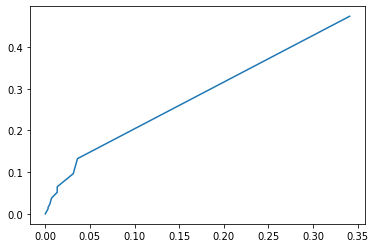

In [ ]:
import matplotlib.pyplot as plt
q=path.ccp_alphas
p=path.impurities
plt.plot(q,p)

In [ ]:
clfs = []

for u in q:
    clf = DecisionTreeClassifier( ccp_alpha=u)
    clf.fit(X_train, y_train)
    clfs.append(clf)

In [ ]:
tree_depth=[i.tree_.max_depth for i in clfs]
tree_depth

[6, 6, 5, 5, 5, 4, 4, 3, 3, 3, 2, 1, 0]

In [ ]:
from sklearn.metrics import accuracy_score
acc=[accuracy_score(y_test,i.predict(X_test)) for i in clfs]
acc


[0.9370629370629371,
 0.9440559440559441,
 0.9370629370629371,
 0.9440559440559441,
 0.9370629370629371,
 0.951048951048951,
 0.951048951048951,
 0.951048951048951,
 0.9230769230769231,
 0.9230769230769231,
 0.8741258741258742,
 0.8741258741258742,
 0.6643356643356644]

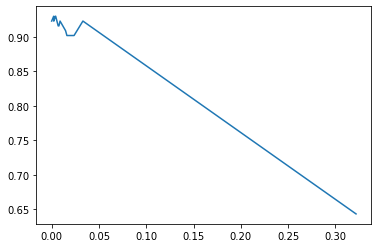

In [ ]:
plt.plot(q,acc)